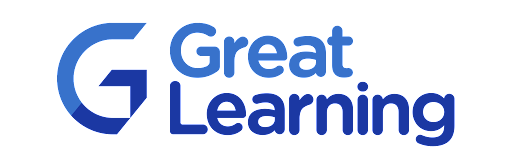

# Agenda

1. Case Study Details

2. Import Libraries

3. Load and Explore Data

4. Data Analysis and Preparation

5. Building Neural Network Model

6. Conclusion

## 1. Case Study Details

### Fashion MNIST Image Classification

#### Domain
Retail, Marketing, Fashion

#### Business Context

Image classification is one of the important use cases in our daily life. Automotive, e-commerce, retail, manufacturing industries, security, surveillance, healthcare, farming etc., can have a wide application of image classification.


####Objective: 

In this notebook, we will build a neural network to classifiy the image based on the object present in the image.

#### Data Description

- The dataset can be found [here](https://www.kaggle.com/datasets/zalando-research/fashionmnist?select=fashion-mnist_train.csv)

- Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000
examples and a test set of 10,000 examples.

- Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

#### Labels

Each training and test example is assigned to one of the following labels:

0. T-shirt/top

1. Trouser

2. Pullover

3. Dress

4. Coat

5. Sandal

6. Shirt

7. Sneaker

8. Bag

9. Ankle boot


## 2. Import Libraries

In [1]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [1]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

## 3. Load and Explore Data

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


## 4.  Data Analysis and Preparation

In [3]:
# Split the train data into train and val set
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train, test_size=0.2,random_state=28)

In [4]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape,X_val.shape,y_val.shape

((48000, 28, 28),
 (10000, 28, 28),
 (48000,),
 (10000,),
 (12000, 28, 28),
 (12000,))

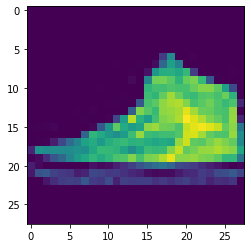

In [5]:
plt.imshow(X_train[1001]) ## cmap='gray'

In [6]:
y_train[1001] ##Verify the label

7

In [7]:
# Normalizing the dataset
X_train_std= X_train.astype('float32') #Modifying the datatype
X_val_std= X_val.astype('float32')
X_train_std /= 255 # Scaling X_train and X_test
X_val_std /=255

In [8]:
X_test_std= X_test.astype('float32')
X_test_std = X_test/255

In [9]:
## One hot encoding of the target columns
Y_train_cat=tf.keras.utils.to_categorical(y_train)
Y_val_cat=tf.keras.utils.to_categorical(y_val)

In [10]:
Y_test_cat=tf.keras.utils.to_categorical(y_test)

## 5. Building the Neural Network Model

We have built the following Neural Network Models in this notebook to understand how the changes in parameters during model building affect the performance of the model

1. Basic NN model
2. Building a model with Weight Initialization
3. Model building by changing Nonlinearity / Activation function from Sigmoid to ReLU
4. Model Building with Batch Normalization
5. Model Building with Batch Normalization and Dropout

### 5.1 Basic NN model

Naive MLP model without any alterations

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import optimizers

In [21]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
model.add(Dense(32))
model.add(Activation('sigmoid'))
model.add(Dense(64))
model.add(Activation('sigmoid'))
model.add(Dense(32))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_2 (Reshape)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 32)                25120     
                                                                 
 activation_8 (Activation)   (None, 32)                0         
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 activation_9 (Activation)   (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 activation_10 (Activation)  (None, 32)               

In [23]:
model.compile(optimizer = tf.keras.optimizers.SGD(), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [24]:
history_1 = model.fit(X_train_std,Y_train_cat,validation_data=(X_val_std,Y_val_cat),batch_size = 32, epochs = 50, verbose = 1)

Epoch 1/50
1500/1500 [==============================] - 4s 2ms/step - loss: 2.3014 - accuracy: 0.1278 - val_loss: 2.2902 - val_accuracy: 0.1002
Epoch 2/50
1500/1500 [==============================] - 3s 2ms/step - loss: 2.2782 - accuracy: 0.2082 - val_loss: 2.2607 - val_accuracy: 0.3333
Epoch 3/50
1500/1500 [==============================] - 3s 2ms/step - loss: 2.2135 - accuracy: 0.2636 - val_loss: 2.1314 - val_accuracy: 0.2867
Epoch 4/50
1500/1500 [==============================] - 3s 2ms/step - loss: 1.9706 - accuracy: 0.2711 - val_loss: 1.8120 - val_accuracy: 0.3170
Epoch 5/50
1500/1500 [==============================] - 3s 2ms/step - loss: 1.7197 - accuracy: 0.3425 - val_loss: 1.6486 - val_accuracy: 0.4356
Epoch 6/50
1500/1500 [==============================] - 3s 2ms/step - loss: 1.5815 - accuracy: 0.4268 - val_loss: 1.5146 - val_accuracy: 0.4980
Epoch 7/50
1500/1500 [==============================] - 3s 2ms/step - loss: 1.4482 - accuracy: 0.4833 - val_loss: 1.3880 - val_accuracy:

In [25]:
# Predicting X_test basis the built model
import numpy as np
y_pred = np.argmax(model.predict(X_test_std), axis=1)
y_pred

313/313 [==============================] - 1s 1ms/step


array([9, 2, 1, ..., 8, 1, 5])

In [26]:
results = model.evaluate(X_test_std, Y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.4913 - accuracy: 0.8310


In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[812,   1,   7,  56,   4,   2, 107,   0,  11,   0],
       [ 12, 934,   2,  39,   3,   0,  10,   0,   0,   0],
       [ 14,   0, 664,  10, 151,   0, 155,   0,   6,   0],
       [ 35,   8,   1, 854,  44,   1,  52,   0,   5,   0],
       [  0,   0,  84,  36, 792,   0,  85,   0,   3,   0],
       [  0,   0,   0,   0,   0, 914,   0,  50,   5,  31],
       [176,   2, 133,  47, 119,   0, 505,   0,  18,   0],
       [  0,   0,   0,   0,   0,  30,   0, 931,   0,  39],
       [  1,   0,   1,   4,   5,   9,  19,   3, 957,   1],
       [  0,   0,   0,   0,   0,  11,   0,  41,   1, 947]])

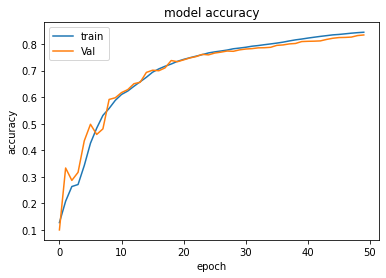

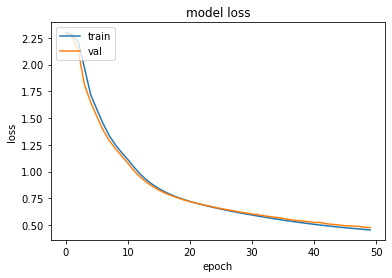

In [29]:
import matplotlib.pyplot as plt

plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#### The basic model is still learning with the increase in the number of epochs. The model is steady to learn with increasing epochs. Let us try to add few more parameters like weights to see if the model learning is faster.

### 5.2 Building a model with Weight Initialization

Changing weight initialization scheme can significantly improve training of the model by preventing vanishing gradient problem up to some degree

Ref: https://keras.io/initializers/

In Keras, there are a number of inbuilt initializers available as listed below:

- RandomNormal
- RandomUniform
- Truncated Normal
- Zeros
- Ones
- GlorotNormal
- GlorotUniform
- HeNormal
- HeUniform
- identity
- Orthogonal
- Constant
- VarianceScaling


Of all the available initializers we have tried the implementation using HeNormal initializer to check how the NN model performs.

In [30]:
model_1 = tf.keras.models.Sequential()
model_1.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
model_1.add(Dense(32, kernel_initializer='he_normal'))                            # use he_normal initializer
model_1.add(Activation('sigmoid'))    
model_1.add(Dense(64, kernel_initializer='he_normal'))                            # use he_normal initializer
model_1.add(Activation('sigmoid'))    
model_1.add(Dense(32, kernel_initializer='he_normal'))                            # use he_normal initializer
model_1.add(Activation('sigmoid'))    
model_1.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
model_1.add(Activation('softmax'))

In [31]:
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_3 (Reshape)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 32)                25120     
                                                                 
 activation_12 (Activation)  (None, 32)                0         
                                                                 
 dense_13 (Dense)            (None, 64)                2112      
                                                                 
 activation_13 (Activation)  (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 activation_14 (Activation)  (None, 32)               

In [33]:
model_1.compile(optimizer = tf.keras.optimizers.SGD(), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [34]:
history_2 = model_1.fit(X_train_std,Y_train_cat,validation_data=(X_val_std,Y_val_cat),batch_size = 32, epochs = 50, verbose = 1)

Epoch 1/50
1500/1500 [==============================] - 3s 2ms/step - loss: 2.2708 - accuracy: 0.2274 - val_loss: 2.2224 - val_accuracy: 0.4300
Epoch 2/50
1500/1500 [==============================] - 3s 2ms/step - loss: 2.1070 - accuracy: 0.3914 - val_loss: 1.9393 - val_accuracy: 0.3637
Epoch 3/50
1500/1500 [==============================] - 3s 2ms/step - loss: 1.7784 - accuracy: 0.4882 - val_loss: 1.6595 - val_accuracy: 0.5717
Epoch 4/50
1500/1500 [==============================] - 3s 2ms/step - loss: 1.5669 - accuracy: 0.5831 - val_loss: 1.4676 - val_accuracy: 0.6286
Epoch 5/50
1500/1500 [==============================] - 3s 2ms/step - loss: 1.3618 - accuracy: 0.6257 - val_loss: 1.2627 - val_accuracy: 0.6152
Epoch 6/50
1500/1500 [==============================] - 3s 2ms/step - loss: 1.1828 - accuracy: 0.6401 - val_loss: 1.1122 - val_accuracy: 0.6378
Epoch 7/50
1500/1500 [==============================] - 3s 2ms/step - loss: 1.0517 - accuracy: 0.6596 - val_loss: 0.9968 - val_accuracy:

In [35]:
# Predicting X_test basis the built model
import numpy as np
y_pred = np.argmax(model_1.predict(X_test_std), axis=1)
y_pred

313/313 [==============================] - 1s 1ms/step


array([9, 2, 1, ..., 8, 1, 5])

In [36]:
results = model_1.evaluate(X_test_std, Y_test_cat)

313/313 [==============================] - 1s 1ms/step - loss: 0.4367 - accuracy: 0.8467


In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[827,   0,   9,  52,   4,   2,  96,   0,  10,   0],
       [  0, 952,   5,  34,   6,   0,   2,   0,   1,   0],
       [ 17,   1, 728,  12, 141,   0,  97,   0,   4,   0],
       [ 30,  15,   4, 866,  44,   1,  36,   0,   3,   1],
       [  0,   1,  81,  32, 799,   0,  83,   0,   4,   0],
       [  0,   0,   0,   1,   0, 902,   0,  63,   7,  27],
       [173,   1,  97,  39,  92,   1, 574,   0,  23,   0],
       [  0,   0,   0,   0,   0,  25,   0, 928,   0,  47],
       [  0,   1,   4,  11,   5,  11,  20,   3, 943,   2],
       [  0,   0,   0,   1,   0,  10,   0,  40,   1, 948]])

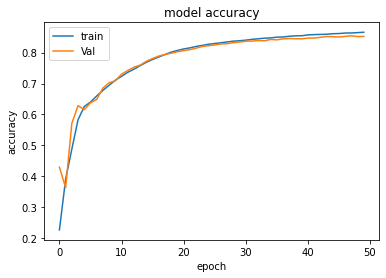

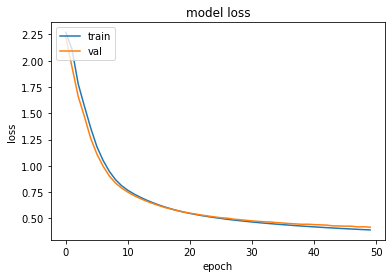

In [38]:
import matplotlib.pyplot as plt

plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### With the addition of weights, for the same number of epochs, the learning has been slightly faster compared the previous model. The performance is similar to the previous model, except the learning is faster here.

### 5.3 Model building by changing Nonlinearity / Activation function from Sigmoid to ReLU

- As Sigmoid functions suffer from Vanishing Gradient problem - it is making training slower

- 'relu' (rectified linear unit) is helps to avoid Vanishing Gradient problem. Trying with it for model building

Ref: https://keras.io/activations/

In [39]:
model_2 = tf.keras.models.Sequential()
model_2.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
model_2.add(Dense(32, kernel_initializer='he_normal'))                            # use he_normal initializer
model_2.add(Activation('relu'))    
model_2.add(Dense(64, kernel_initializer='he_normal'))                            # use he_normal initializer
model_2.add(Activation('relu'))    
model_2.add(Dense(32, kernel_initializer='he_normal'))                            # use he_normal initializer
model_2.add(Activation('relu'))    
model_2.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
model_2.add(Activation('Softmax'))

In [40]:
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_4 (Reshape)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 32)                25120     
                                                                 
 activation_16 (Activation)  (None, 32)                0         
                                                                 
 dense_17 (Dense)            (None, 64)                2112      
                                                                 
 activation_17 (Activation)  (None, 64)                0         
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 activation_18 (Activation)  (None, 32)               

In [41]:
model_2.compile(optimizer = tf.keras.optimizers.SGD(), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [42]:
history_3 = model_2.fit(X_train_std,Y_train_cat,validation_data=(X_val_std,Y_val_cat),batch_size = 32, epochs = 50, verbose = 1)

Epoch 1/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.7934 - accuracy: 0.7268 - val_loss: 0.5496 - val_accuracy: 0.8103
Epoch 2/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5207 - accuracy: 0.8205 - val_loss: 0.4907 - val_accuracy: 0.8239
Epoch 3/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4670 - accuracy: 0.8375 - val_loss: 0.4540 - val_accuracy: 0.8404
Epoch 4/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4339 - accuracy: 0.8487 - val_loss: 0.4210 - val_accuracy: 0.8503
Epoch 5/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4150 - accuracy: 0.8544 - val_loss: 0.4104 - val_accuracy: 0.8551
Epoch 6/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3970 - accuracy: 0.8597 - val_loss: 0.3996 - val_accuracy: 0.8588
Epoch 7/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3835 - accuracy: 0.8637 - val_loss: 0.3937 - val_accuracy:

In [43]:
# Predicting X_test basis the built model
import numpy as np
y_pred = np.argmax(model_2.predict(X_test_std), axis=1)
y_pred

313/313 [==============================] - 0s 1ms/step


array([9, 2, 1, ..., 8, 1, 5])

In [44]:
results = model_2.evaluate(X_test_std, Y_test_cat)

313/313 [==============================] - 1s 1ms/step - loss: 0.4693 - accuracy: 0.8407


In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[811,   3,   8,  31,   0,   1, 137,   0,   9,   0],
       [  6, 964,   2,  21,   2,   0,   4,   0,   1,   0],
       [ 16,   3, 772,  14,  24,   0, 164,   1,   6,   0],
       [ 37,  10,   8, 892,   9,   0,  40,   0,   4,   0],
       [  1,   1, 166,  66, 469,   1, 292,   0,   4,   0],
       [  1,   0,   0,   1,   0, 922,   0,  45,   5,  26],
       [132,   0,  63,  30,  15,   0, 752,   0,   8,   0],
       [  0,   0,   0,   0,   0,  16,   0, 971,   0,  13],
       [  4,   0,   7,   5,   1,   2,  23,   8, 950,   0],
       [  0,   0,   0,   2,   0,   6,   1,  87,   0, 904]])

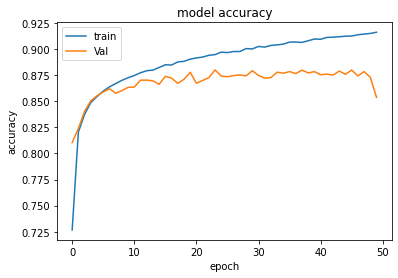

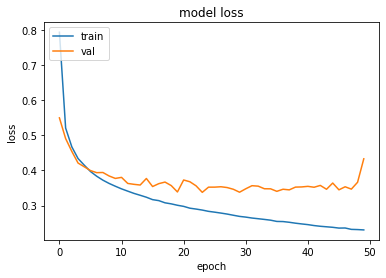

In [46]:
import matplotlib.pyplot as plt

plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### As mentioned the model learning has been very fast. It reaches the maximum accuracy within 30 epochs and then slowly decreases on reaching the 50 epoch. Even the previous models could have dipped after few more number of epochs, but with the addition of relu, potraied the performace with fewer epochs. 

### 5.4 Model Building with Batch Normalization

Batch Normalization, one of the methods to prevent the "internal covariance shift" problem, has proven to be highly effective

Normalize each mini-batch before nonlinearity

Ref: https://keras.io/optimizers/

In [47]:
from tensorflow.keras.layers import BatchNormalization, Dropout

Batch normalization layer is usually inserted after dense/convolution and before nonlinearity



In [48]:
model_3 = tf.keras.models.Sequential()
model_3.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
model_3.add(Dense(32))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))
model_3.add(Dense(64))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))
model_3.add(Dense(32))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))
model_3.add(Dense(10))
model_3.add(Activation('Softmax'))

In [49]:
model_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_5 (Reshape)         (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 32)                25120     
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 activation_20 (Activation)  (None, 32)                0         
                                                                 
 dense_21 (Dense)            (None, 64)                2112      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                      

In [51]:
model_3.compile(optimizer = tf.keras.optimizers.SGD(), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [52]:
history_4 = model_3.fit(X_train_std,Y_train_cat,validation_data=(X_val_std,Y_val_cat),batch_size = 32, epochs = 50, verbose = 1)

Epoch 1/50
1500/1500 [==============================] - 5s 2ms/step - loss: 0.7858 - accuracy: 0.7569 - val_loss: 0.5290 - val_accuracy: 0.8183
Epoch 2/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5109 - accuracy: 0.8256 - val_loss: 0.4492 - val_accuracy: 0.8405
Epoch 3/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4540 - accuracy: 0.8425 - val_loss: 0.4146 - val_accuracy: 0.8493
Epoch 4/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4176 - accuracy: 0.8541 - val_loss: 0.4137 - val_accuracy: 0.8478
Epoch 5/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3981 - accuracy: 0.8605 - val_loss: 0.3741 - val_accuracy: 0.8648
Epoch 6/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3842 - accuracy: 0.8625 - val_loss: 0.3658 - val_accuracy: 0.8671
Epoch 7/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3651 - accuracy: 0.8685 - val_loss: 0.3700 - val_accuracy:

In [53]:
# Predicting X_test basis the built model
import numpy as np
y_pred = np.argmax(model_3.predict(X_test_std), axis=1)
y_pred

313/313 [==============================] - 1s 2ms/step


array([9, 2, 1, ..., 8, 1, 5])

In [54]:
results = model_3.evaluate(X_test_std, Y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.3634 - accuracy: 0.8774


In [55]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[864,   2,  18,  20,   6,   1,  78,   0,  11,   0],
       [  6, 969,   0,  18,   3,   0,   2,   0,   2,   0],
       [ 18,   1, 799,  13, 104,   0,  59,   0,   6,   0],
       [ 26,   6,  17, 896,  30,   0,  19,   0,   6,   0],
       [  7,   1,  97,  33, 804,   0,  54,   0,   4,   0],
       [  0,   0,   0,   0,   0, 943,   0,  42,   4,  11],
       [160,   1, 102,  30,  72,   1, 618,   0,  16,   0],
       [  0,   0,   0,   0,   0,  11,   0, 954,   1,  34],
       [  9,   0,   2,   2,   3,   1,   6,   4, 973,   0],
       [  0,   0,   0,   0,   0,  12,   1,  32,   1, 954]])

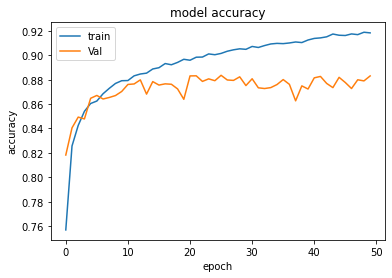

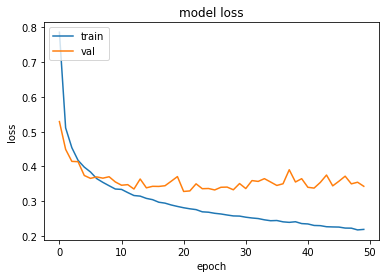

In [56]:
import matplotlib.pyplot as plt

plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### With the addition of Batch Normalisation there is a slight increase in the performance but still the model is slightly overfitting.

### 5.5 Model Building with Batch Normalization and Dropout

In [61]:
model_4 = tf.keras.models.Sequential()
model_4.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

model_4.add(Dense(32))
model_4.add(BatchNormalization())
#model_4.add(Dropout(0.2))
model_4.add(Activation('relu'))
model_4.add(Dense(64))
model_4.add(BatchNormalization())
model_4.add(Dropout(0.2))
model_4.add(Activation('relu'))
model_4.add(Dense(32))
model_4.add(BatchNormalization())
model_4.add(Dropout(0.2))
model_4.add(Activation('relu'))
model_4.add(Dense(10))
model_4.add(Activation('softmax'))

In [62]:
model_4.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_7 (Reshape)         (None, 784)               0         
                                                                 
 dense_28 (Dense)            (None, 32)                25120     
                                                                 
 batch_normalization_6 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 activation_28 (Activation)  (None, 32)                0         
                                                                 
 dense_29 (Dense)            (None, 64)                2112      
                                                                 
 batch_normalization_7 (Batc  (None, 64)               256       
 hNormalization)                                      

In [63]:
model_4.compile(optimizer = tf.keras.optimizers.SGD(), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [64]:
history_5 = model_4.fit(X_train_std,Y_train_cat,validation_data=(X_val_std,Y_val_cat),batch_size = 32, epochs = 50, verbose = 1)

Epoch 1/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.9572 - accuracy: 0.7005 - val_loss: 0.5308 - val_accuracy: 0.8214
Epoch 2/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6436 - accuracy: 0.7934 - val_loss: 0.4691 - val_accuracy: 0.8330
Epoch 3/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5778 - accuracy: 0.8092 - val_loss: 0.4278 - val_accuracy: 0.8482
Epoch 4/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5420 - accuracy: 0.8210 - val_loss: 0.4269 - val_accuracy: 0.8503
Epoch 5/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5151 - accuracy: 0.8284 - val_loss: 0.4069 - val_accuracy: 0.8534
Epoch 6/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4962 - accuracy: 0.8353 - val_loss: 0.3992 - val_accuracy: 0.8593
Epoch 7/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4800 - accuracy: 0.8386 - val_loss: 0.3763 - val_accuracy:

In [65]:
results = model_4.evaluate(X_test_std, Y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.3677 - accuracy: 0.8713


In [67]:
# Predicting X_test basis the built model
import numpy as np
y_pred_4 = np.argmax(model_4.predict(X_test_std), axis=1)
y_pred_4

313/313 [==============================] - 1s 1ms/step


array([9, 2, 1, ..., 8, 1, 5])

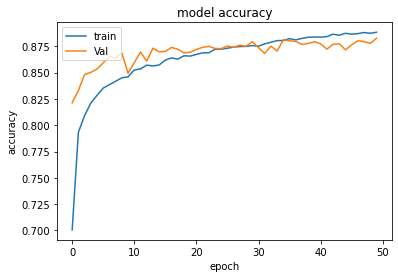

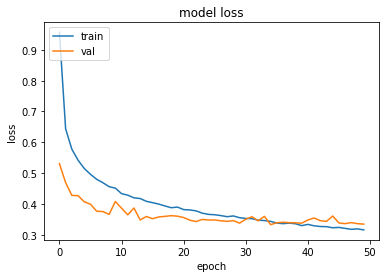

In [66]:
import matplotlib.pyplot as plt

plt.plot(history_5.history['accuracy'])
plt.plot(history_5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#### With the addition of 2 dropout layers, overfittin has reduced. But still to imporve the model performance, we can try varying optimizers and learning rate and see how the model performance changes.

## Model 5 - Changing the optimizer to Adam and adding some learning rate

In [73]:
model_5 = tf.keras.models.Sequential()
model_5.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

model_5.add(Dense(32))
model_5.add(BatchNormalization())
model_5.add(Activation('relu'))
model_5.add(Dense(64))
model_5.add(BatchNormalization())
model_5.add(Dropout(0.2))
model_5.add(Activation('relu'))
model_5.add(Dense(32))
model_5.add(BatchNormalization())
model_5.add(Dropout(0.2))
model_5.add(Activation('relu'))
model_5.add(Dense(10))
model_5.add(Activation('softmax'))

In [74]:
model_5.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_9 (Reshape)         (None, 784)               0         
                                                                 
 dense_36 (Dense)            (None, 32)                25120     
                                                                 
 batch_normalization_12 (Bat  (None, 32)               128       
 chNormalization)                                                
                                                                 
 activation_36 (Activation)  (None, 32)                0         
                                                                 
 dense_37 (Dense)            (None, 64)                2112      
                                                                 
 batch_normalization_13 (Bat  (None, 64)               256       
 chNormalization)                                     

In [75]:
model_5.compile(optimizer = tf.keras.optimizers.Adam(lr=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])

/Users/gowthamswaminathan/opt/anaconda3/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [76]:
history_6 = model_5.fit(X_train_std,Y_train_cat,validation_data=(X_val_std,Y_val_cat),batch_size = 16, epochs = 50, verbose = 1)

Epoch 1/50
3000/3000 [==============================] - 8s 2ms/step - loss: 0.7042 - accuracy: 0.7589 - val_loss: 0.4775 - val_accuracy: 0.8263
Epoch 2/50
3000/3000 [==============================] - 7s 2ms/step - loss: 0.5682 - accuracy: 0.8035 - val_loss: 0.4754 - val_accuracy: 0.8378
Epoch 3/50
3000/3000 [==============================] - 7s 2ms/step - loss: 0.5323 - accuracy: 0.8175 - val_loss: 0.4515 - val_accuracy: 0.8284
Epoch 4/50
3000/3000 [==============================] - 7s 2ms/step - loss: 0.4970 - accuracy: 0.8279 - val_loss: 0.4001 - val_accuracy: 0.8558
Epoch 5/50
3000/3000 [==============================] - 7s 2ms/step - loss: 0.4794 - accuracy: 0.8321 - val_loss: 0.4018 - val_accuracy: 0.8520
Epoch 6/50
3000/3000 [==============================] - 7s 2ms/step - loss: 0.4671 - accuracy: 0.8384 - val_loss: 0.4203 - val_accuracy: 0.8470
Epoch 7/50
3000/3000 [==============================] - 7s 2ms/step - loss: 0.4587 - accuracy: 0.8384 - val_loss: 0.4157 - val_accuracy:

In [78]:
results = model_5.evaluate(X_test_std, Y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.3681 - accuracy: 0.8711


In [79]:
# Predicting X_test basis the built model
import numpy as np
y_pred_5 = np.argmax(model_5.predict(X_test_std), axis=1)
y_pred_5

313/313 [==============================] - 1s 2ms/step


array([9, 2, 1, ..., 8, 1, 5])

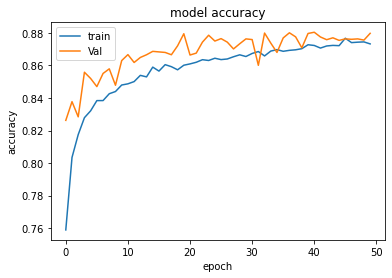

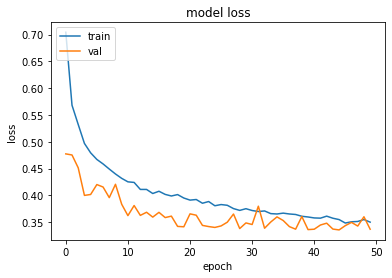

In [80]:
import matplotlib.pyplot as plt

plt.plot(history_6.history['accuracy'])
plt.plot(history_6.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_6.history['loss'])
plt.plot(history_6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Even with the addition of adam optimizer there is not a big change in the model performance. So conitnuing with the above model as the final model and then saving it for future use.

# Saving the model for future use

In [81]:
# Saving the model
model_5.save('nn.h5')
model_5.save_weights('nn_weights.h5')

In [82]:
from tensorflow.keras.models import load_model
model_nn = load_model('nn.h5')
model_nn.load_weights('nn_weights.h5')

In [87]:
X_test.shape

(10000, 28, 28)

[320 728 845 839 944]


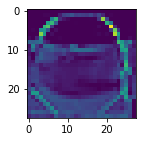

Actual Label: 8
1/1 [==============================] - 0s 37ms/step
Predicted Label: 0
-----------X--------------


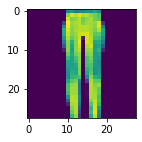

Actual Label: 1
1/1 [==============================] - 0s 17ms/step
Predicted Label: 1
-----------X--------------


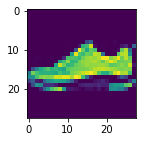

Actual Label: 7
1/1 [==============================] - 0s 19ms/step
Predicted Label: 7
-----------X--------------


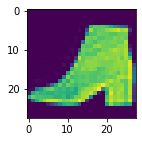

Actual Label: 9
1/1 [==============================] - 0s 19ms/step
Predicted Label: 9
-----------X--------------


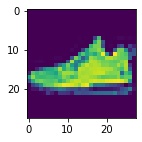

Actual Label: 7
1/1 [==============================] - 0s 22ms/step
Predicted Label: 7
-----------X--------------


In [96]:
# validaitng the prediction that is run on X-test after model building with the actual values in X_test
var = np.random.randint(0, 1000, 5)
print(var)
for i in var: 
  plt.figure(figsize=(2,2))
  plt.imshow(X_test_std[i])
  plt.show()
  print('Actual Label:',y_test[i])
  y_pred_final = np.argmax(model_nn.predict(X_test[i].reshape(1, 28, 28)))
  print('Predicted Label:',y_pred_final)
  print('-----------X--------------')

### Labels for reference

0. T-shirt/top

1. Trouser

2. Pullover

3. Dress

4. Coat

5. Sandal

6. Shirt

7. Sneaker

8. Bag

9. Ankle boot

##6. Conclusion

- To summarize this notebook, we do some basic data preprocessing, make a model with sigmoid function as our activation functions and get an accuracy of 87.7 % and we observe over fitting in this model.

- Using 'he_normal' comparatively there is a slight improvement after using weight intializer such that the overfitting in the model has reduced fairly.

- By changing the activation function to relu for the hidden layers we see that there is continuous variation between the train and validation accuracy and losses and as the epoch increases this again results in an increased overfitting.

- On implementing batch normalization we see that the variation has decreased and the accuracy of the model has comparatively improved from the previous model.

- And finally we try to implement dropout along with batch normalization and see that we the overfitting is the least amongst the models we have built, making this as the preferred model over the rest.

- Here we also can try different combinations while building a model apart from the models that are built in this notebook and try to get a model with better performance.